# DATA LOAD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.metrics import f1_score
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.1 MB/s eta 0:00:00


In [4]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train_df = pd.read_csv('/content/drive/MyDrive/ESAA YB/0_Summer_project/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ESAA YB/0_Summer_project/test.csv')

In [7]:
train_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign


In [8]:
test_df.head()

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
0,TEST_0000,192.168.10.243,61955.0,192.168.10.249,55.0,UDP,351.844741,3,3,NaN,...,0.409271,0.719067,NaN,NaN,0,0,0,0,0,NaN
1,TEST_0001,NaN,53118.0,NaN,2094.0,TCP,0.000063,1,1,15887.515152,...,0.000000,0.000000,0.00,0.00,29200,0,1,0,1,NaN
2,TEST_0002,192.168.10.43,NaN,NaN,51.0,UDP,0.060045,2,2,33.308350,...,1299.025647,2231.659444,53.00,53.00,0,0,0,0,0,0.020015
3,TEST_0003,192.168.10.243,62431.0,192.168.10.249,61.0,UDP,NaN,2,2,0.008455,...,0.384714,0.930079,77.75,77.75,0,0,0,0,0,78.846374
4,TEST_0004,NaN,62365.0,192.168.10.249,56.0,UDP,0.095316,1,1,10.491425,...,482.605567,1363.885298,88.00,88.00,0,0,0,0,0,NaN


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11999 non-null  object 
 1   ip_src            9487 non-null   object 
 2   port_src          8625 non-null   float64
 3   ip_dst            10695 non-null  object 
 4   port_dst          9712 non-null   float64
 5   protocol          11999 non-null  object 
 6   duration          10925 non-null  float64
 7   pkt_count_fwd     11999 non-null  int64  
 8   pkt_count_bwd     11999 non-null  int64  
 9   rate_fwd_pkts     10828 non-null  float64
 10  rate_bwd_pkts     10312 non-null  float64
 11  rate_fwd_bytes    11999 non-null  float64
 12  rate_bwd_bytes    11999 non-null  float64
 13  payload_fwd_mean  10214 non-null  float64
 14  payload_bwd_mean  10214 non-null  float64
 15  tcp_win_fwd_init  11999 non-null  int64  
 16  tcp_win_bwd_init  11999 non-null  int64 

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                3000 non-null   object 
 1   ip_src            2363 non-null   object 
 2   port_src          2175 non-null   float64
 3   ip_dst            2655 non-null   object 
 4   port_dst          2438 non-null   float64
 5   protocol          3000 non-null   object 
 6   duration          2725 non-null   float64
 7   pkt_count_fwd     3000 non-null   int64  
 8   pkt_count_bwd     3000 non-null   int64  
 9   rate_fwd_pkts     2672 non-null   float64
 10  rate_bwd_pkts     2588 non-null   float64
 11  rate_fwd_bytes    3000 non-null   float64
 12  rate_bwd_bytes    3000 non-null   float64
 13  payload_fwd_mean  2536 non-null   float64
 14  payload_bwd_mean  2536 non-null   float64
 15  tcp_win_fwd_init  3000 non-null   int64  
 16  tcp_win_bwd_init  3000 non-null   int64  


# 전처리

In [11]:
train = train_df.copy() ## 데이터 복사
test = test_df.copy()

## payload 결측치 관련 파생변수

In [12]:
# payload 결측치 플래그
train['payload_bwd_missing_flag'] = train['payload_bwd_mean'].isna().astype(int)
test['payload_bwd_missing_flag'] = test['payload_bwd_mean'].isna().astype(int)

## 결측치 처리

In [13]:
#=============================================================================
# 포트 변수 변수 => -1
# payload, rate, iat_avg_packets, duration, => 중앙값
#=============================================================================

train['port_src'].fillna(-1, inplace=True) # -1 대체
train['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = train['payload_bwd_mean'].median() # 중앙값 대체
train['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = train['payload_fwd_mean'].median()
train['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = train['iat_avg_packets'].median()
train['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = train['duration'].median()
train['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = train['rate_fwd_pkts'].median()
train['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = train['rate_bwd_pkts'].median()
train['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

In [14]:
test['port_src'].fillna(-1, inplace=True) # -1 대체
test['port_dst'].fillna(-1, inplace=True)

payload_bwd_median = test['payload_bwd_mean'].median() # 중앙값 대체
test['payload_bwd_mean'].fillna(payload_bwd_median, inplace=True)

payload_fwd_median = test['payload_fwd_mean'].median()
test['payload_fwd_mean'].fillna(payload_fwd_median, inplace=True)

iat_median = test['iat_avg_packets'].median()
test['iat_avg_packets'].fillna(iat_median, inplace=True)

duration_median = test['duration'].median()
test['duration'].fillna(duration_median, inplace=True)

rate_fwd_median = test['rate_fwd_pkts'].median()
test['rate_fwd_pkts'].fillna(rate_fwd_median, inplace=True)

rate_bwd_median = test['rate_bwd_pkts'].median()
test['rate_bwd_pkts'].fillna(rate_bwd_median, inplace=True)

## 값 기반 범주화 (syn_flag_cat, port_dst_cat)

In [15]:
#=============================================================================
# tcp_syn_count => 3개로 범주화
# port_dst => 1~2023/이후 상위 5개/나머지
#=============================================================================

def categorize_syn(x):
    if x == 0:
        return 0  # 정상
    elif x in [1, 2]:
        return 1  # 약간의 SYN 요청
    else:
        return 2  # SYN Flooding 가능성

train['syn_flag_cat'] = train['tcp_syn_count'].apply(categorize_syn)
test['syn_flag_cat'] = test['tcp_syn_count'].apply(categorize_syn)

In [16]:
# port_dst>1023 데이터 중 상위 5개 포트 추출
dst_port_high = train[train['port_dst'] > 1023]['port_dst']
top5_ports = dst_port_high.value_counts().nlargest(5).index

def categorize_port_dst(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

train['port_dst_cat'] = train['port_dst'].apply(categorize_port_dst)

In [17]:
dst_port_high_test = test[test['port_dst'] > 1023]['port_dst']
top5_ports_test = dst_port_high_test.value_counts().nlargest(5).index

def categorize_port_dst_test(p):
    if p <= 1023:
        return str(int(p))  # 0~1023은 그대로
    elif p in top5_ports_test:
        return f'special_{int(p)}' # 1024, 8072, 49152, 8079, 2602
    else:
        return 'other'

test['port_dst_cat'] = test['port_dst'].apply(categorize_port_dst_test)

## 추가 파생변수

In [18]:
# PSH 유무: tcp_psh_count > 0 → 1, else → 0
train['has_psh_flag'] = (train['tcp_psh_count'] > 0).astype(int)
test['has_psh_flag'] = (test['tcp_psh_count'] > 0).astype(int)

# 초당 패킷 전송 비율 = rate_fwd_pkts / rate_bwd_pkts
train['rate_pkts_ratio'] = train['rate_fwd_pkts'] / (train['rate_bwd_pkts'] + 1e-5) # 0으로 나누는 것 방지
test['rate_pkts_ratio'] = test['rate_fwd_pkts'] / (test['rate_bwd_pkts'] + 1e-5)

# 송수신 패킷 비율 = pkt_count_fwd / pkt_count_bwd
train['pkt_count_ratio'] = train['pkt_count_fwd'] / (train['pkt_count_bwd'] + 1e-5)
test['pkt_count_ratio'] = test['pkt_count_fwd'] / (test['pkt_count_bwd'] + 1e-5)

# 패킷 간 평균 시간 간격 이진 파생변수: iat_avg_packets <= 1 → 1, else → 0
train['is_iat_low'] = (train['iat_avg_packets'] <= 1.0).astype(int)
test['is_iat_low'] = (test['iat_avg_packets'] <= 1.0).astype(int)

train.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True) ## 불필요한 기존변수삭제
test.drop(['tcp_psh_count','rate_fwd_pkts','rate_bwd_pkts',
            'pkt_count_fwd','pkt_count_bwd'], axis=1, inplace=True)

## 변수 삭제

In [19]:
#=============================================================================
# ID, ip_scr, ip_dst, port_src
# payload_fwd_mean (bwd와 겹치는 칼럼)
#=============================================================================

train.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)
test.drop(['ID','ip_src','ip_dst','payload_fwd_mean','port_src','port_dst','tcp_syn_count'], axis=1, inplace=True)

## 로그변환

In [20]:
import numpy as np

log_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio' # 파생변수 포함
]

for col in log_cols:
    train[col] = np.log1p(train[col])

for col in log_cols:
    test[col] = np.log1p(test[col])

## 스케일링

In [21]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'duration',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'payload_bwd_mean',
    'tcp_rst_count',
    'tcp_win_fwd_init',
    'tcp_win_bwd_init',
    'iat_avg_packets',
    'rate_pkts_ratio',
    'pkt_count_ratio'
]

# 스케일러 객체 생성
scaler = StandardScaler()

# 스케일링 적용
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

## LabelEncoding

In [22]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
le_protocol = LabelEncoder()
le_postdst = LabelEncoder()
le_attack = LabelEncoder()

le_protocol.fit(pd.concat([train['protocol'], test['protocol']], axis=0).astype(str).unique())
le_postdst.fit(pd.concat([train['port_dst_cat'], test['port_dst_cat']], axis=0).astype(str).unique())

train['protocol'] = le_protocol.transform(train['protocol'].astype(str))
train['port_dst_cat'] = le_postdst.transform(train['port_dst_cat'].astype(str))
train['attack_type'] = le_attack.fit_transform(train['attack_type']) # attack_type is only in train

test['protocol'] = le_protocol.transform(test['protocol'].astype(str))
test['port_dst_cat'] = le_postdst.transform(test['port_dst_cat'].astype(str))

## X, Y 데이터 분리

In [23]:
# Features
X = train.drop('attack_type',axis=1)

# Target
y = train['attack_type'].values

In [24]:
# import Library
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=156)

## SMOTE + RandomUnderSampling

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# SMOTE 객체 생성
smote = SMOTE(random_state=156,k_neighbors=3)

# RandomUnderSampler 객체 생성
under_sampler = RandomUnderSampler(random_state=156)

# SMOTE와 RandomUnderSampler를 적용시키는 파이프라인 생성
pipeline = Pipeline([('over', smote), ('under', under_sampler)])

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# 모델링

## RandomForest

In [33]:
# Import Library
from sklearn.ensemble import RandomForestClassifier

# --------------------------------------------------------------------------------

# RandomForestClassifier 객체 생성
rf = RandomForestClassifier(n_estimators=100, random_state=156, n_jobs=-1)

# 학습 및 예측
rf.fit(X_resampled, y_resampled)
pred_rf = rf.predict(X_val)

print(f'랜덤포레스트 Macro F1 Score: {f1_score(y_val, pred_rf, average="macro"):.4f}')

랜덤포레스트 Macro F1 Score: 0.7128


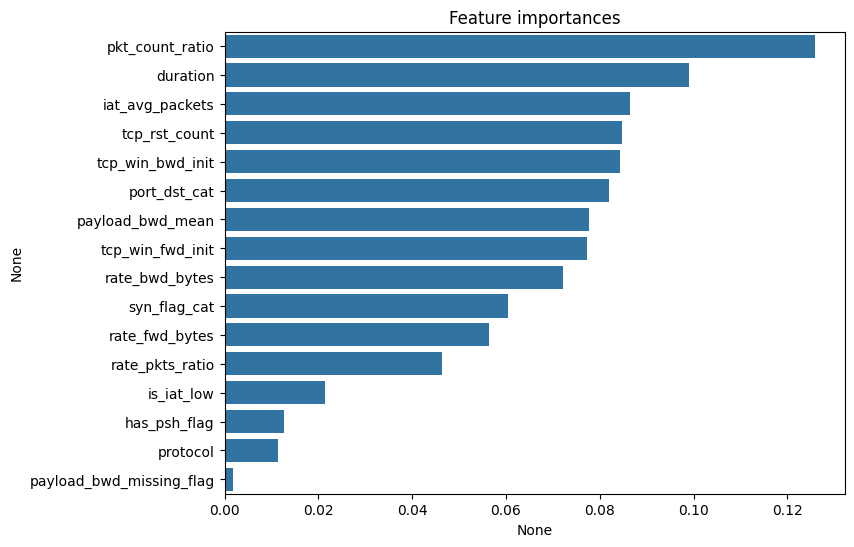

In [34]:
# 피처 중요도 추출
ftr_importances_values = rf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

### GridSearchCV를 이용한 하이퍼파라미터 튜닝

In [32]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# --------------------------------------------------------------------------------

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=156)

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [2, 8, 16]
}
grid = GridSearchCV(RandomForestClassifier(random_state=156, n_jobs=-1), param_grid, cv=5)
grid.fit(X_resampled, y_resampled)

# 최적 파라미터로 모델 생성
rf_best = RandomForestClassifier(**grid.best_params_, random_state=156, n_jobs=-1)

rf_best.fit(X_resampled, y_resampled)
pred_rf_best = rf_best.predict(X_val)

print(f'랜덤포레스트 Macro F1 Score: {f1_score(y_val, pred_rf_best, average="macro"):.4f}')

랜덤포레스트 Macro F1 Score: 0.7199


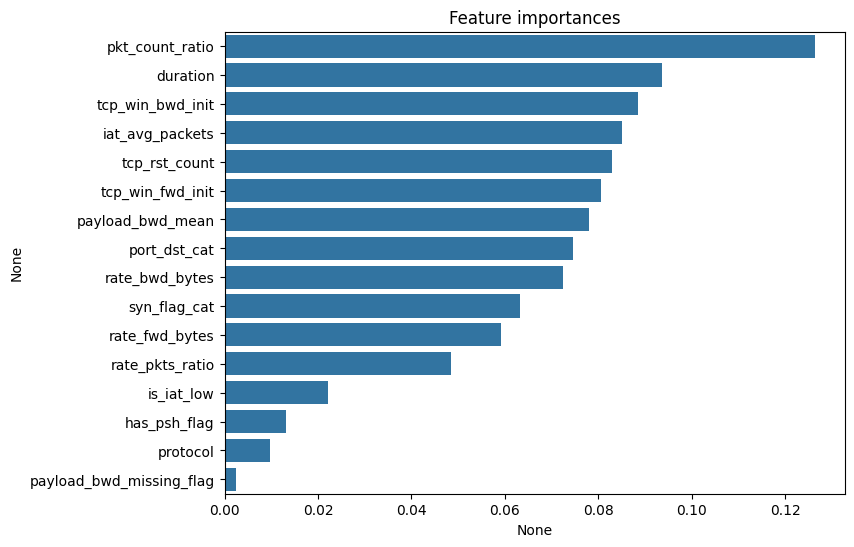

In [33]:
# 피처 중요도 추출
ftr_importances_values = rf_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## XGBoost

In [35]:
# Import Library
import xgboost as xgb
from xgboost import XGBClassifier

# --------------------------------------------------------------------------------

# XGBoostClassifier 객체 생성
xgb = XGBClassifier(n_estimators=300, learning_rate=0.05,
                    random_state=156, n_jobs=-1)

# 학습 및 예측
xgb.fit(X_resampled, y_resampled)
pred_xgb = xgb.predict(X_val)

print(f'XGBoost Macro F1 Score: {f1_score(y_val, pred_xgb, average="macro"):.4f}')

XGBoost Macro F1 Score: 0.6871


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 800x600 with 0 Axes>

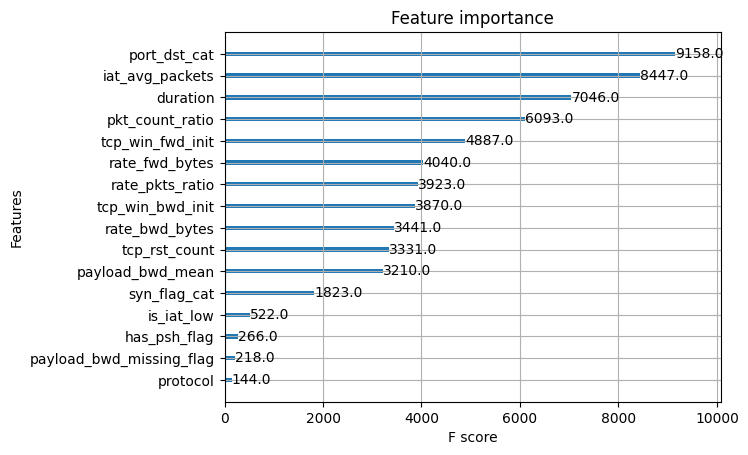

In [36]:
# Import Library
from xgboost import plot_importance

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plot_importance(xgb)

### Optuna를 이용한 하이퍼파라미터 튜닝

In [36]:
# Import Libraries
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=156)

# objective 함수 생성
def objective(trial):
    params = {
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.005,0.01,0.05,0.1]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }

    model = XGBClassifier(**params, random_state=156, n_jobs=-1)
    score = cross_val_score(model, X_resampled, y_resampled, cv=skf, scoring='f1_macro').mean()
    return score

# Optuna 실행
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=156))
study.optimize(objective, n_trials=50)

[I 2025-07-17 18:09:34,257] A new study created in memory with name: no-name-f0b1a773-3050-4dff-a467-a5c4a642063d
[I 2025-07-17 18:13:52,522] Trial 0 finished with value: 0.980705637530981 and parameters: {'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.01, 'n_estimators': 354, 'max_depth': 13, 'min_child_weight': 81}. Best is trial 0 with value: 0.980705637530981.
[I 2025-07-17 18:16:16,632] Trial 1 finished with value: 0.9978720741876907 and parameters: {'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.1, 'n_estimators': 208, 'max_depth': 9, 'min_child_weight': 4}. Best is trial 1 with value: 0.9978720741876907.
[I 2025-07-17 18:21:34,372] Trial 2 finished with value: 0.9735281848620099 and parameters: {'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.005, 'n_estimators': 461, 'max_depth': 13, 'min_child_weight': 159}. Best is trial 1 with value: 0.9978720741876907.
[I 2025-07-17 18:22:52,867] Trial 3 finished with value: 0.9770728560868737 and

In [37]:
# 최적 파라미터 모델 생성
xgb_best = XGBClassifier(**study.best_trial.params, random_state=156, n_jobs=-1)

# 학습 및 예측
xgb_best.fit(X_resampled, y_resampled)
pred_xgb_best = xgb_best.predict(X_val)

print(f'XGBoost Macro F1 Score: {f1_score(y_val, pred_xgb_best, average="macro"):.4f}')

XGBoost Macro F1 Score: 0.7011


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 800x600 with 0 Axes>

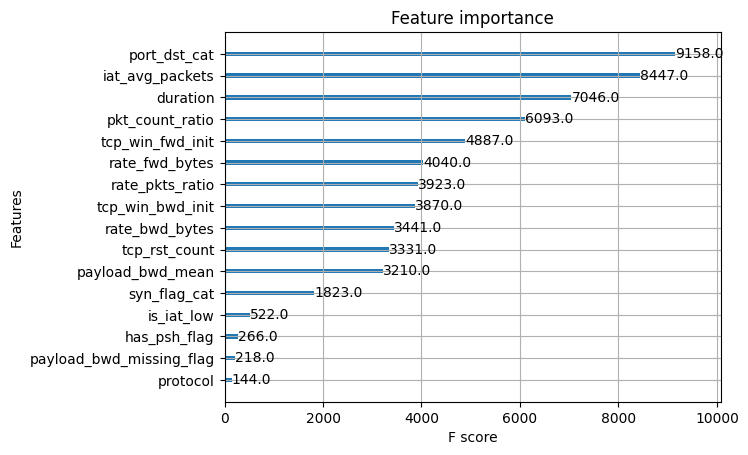

In [38]:
# Import Library
from xgboost import plot_importance

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plot_importance(xgb)

## LightGBM

In [26]:
# Import Library
from lightgbm import LGBMClassifier

# --------------------------------------------------------------------------------

# LightGBM 객체 생성
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.05,
                      random_state=156, n_jobs=-1, verbose=0)

# 학습 및 예측
lgbm.fit(X_resampled, y_resampled)
pred_lgbm = lgbm.predict(X_val)

print(f'LightGBM Macro F1 Score: {f1_score(y_val, pred_lgbm, average="macro"):.4f}')

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

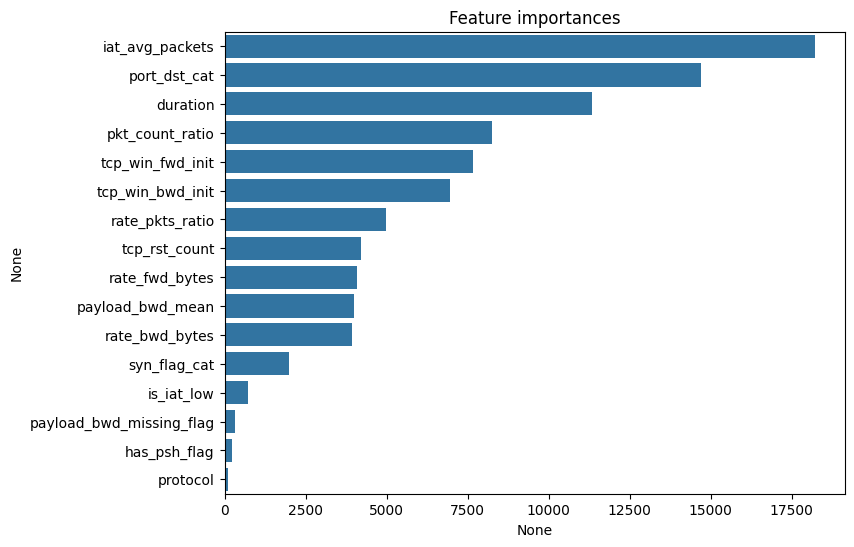

In [28]:
# 피처 중요도 추출
ftr_importances_values = lgbm.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

## CatBoost

In [30]:
# Import Library
from catboost import CatBoostClassifier, Pool

# --------------------------------------------------------------------------------

# CatBoost 객체 생성
cat = CatBoostClassifier(n_estimators=300, learning_rate=0.05, random_state=156)

# 학습 및 예측
cat.fit(X_resampled, y_resampled)
pred_cat = cat.predict(X_val)

print(f'CatBoost Macro F1 Score: {f1_score(y_val, pred_cat, average="macro"):.4f}')

0:	learn: 2.1733607	total: 332ms	remaining: 1m 39s
1:	learn: 1.9739396	total: 576ms	remaining: 1m 25s
2:	learn: 1.8125553	total: 805ms	remaining: 1m 19s
3:	learn: 1.6821571	total: 1.03s	remaining: 1m 16s
4:	learn: 1.5758101	total: 1.29s	remaining: 1m 15s
5:	learn: 1.4846839	total: 1.52s	remaining: 1m 14s
6:	learn: 1.4056400	total: 1.74s	remaining: 1m 12s
7:	learn: 1.3382654	total: 1.98s	remaining: 1m 12s
8:	learn: 1.2722868	total: 2.22s	remaining: 1m 11s
9:	learn: 1.2172575	total: 2.45s	remaining: 1m 11s
10:	learn: 1.1614553	total: 2.68s	remaining: 1m 10s
11:	learn: 1.1093757	total: 2.91s	remaining: 1m 9s
12:	learn: 1.0637717	total: 3.15s	remaining: 1m 9s
13:	learn: 1.0166818	total: 3.39s	remaining: 1m 9s
14:	learn: 0.9747081	total: 3.62s	remaining: 1m 8s
15:	learn: 0.9368687	total: 3.85s	remaining: 1m 8s
16:	learn: 0.9075730	total: 4.08s	remaining: 1m 7s
17:	learn: 0.8730965	total: 4.32s	remaining: 1m 7s
18:	learn: 0.8417528	total: 4.55s	remaining: 1m 7s
19:	learn: 0.8171760	total: 4.

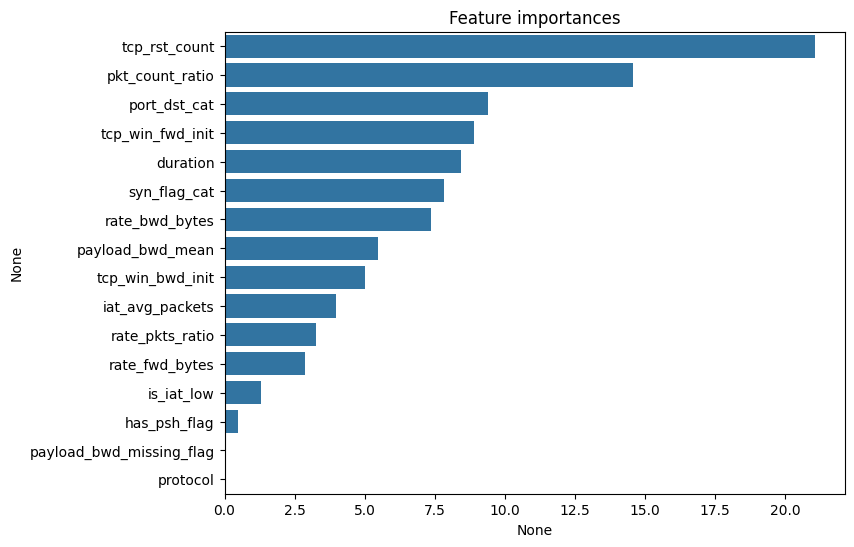

In [31]:
# 피처 중요도 추출
ftr_importances_values = cat.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)

# 피처 중요도 시각화
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()